# Método de Euler

__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

__solución:__ creamos la función pedida

In [1]:
doc"""
esta función resulve una ecuación diferencial de primer orden usando $\dot{x}=f(x,t); x(t_0)=x_0$ por el método de euler, por favor introduzca (f,x_0,ancho de aproximación), donde el ancho puede ser un arreglo
"""
function euler(f,x0,A)
    l=length(A) # elementos en A
    B=zeros(l)  #guardara las x_k de la iteración
    B[1]=x0 #metemos la condición inicial
    h=abs(A[2]-A[1]) 
    for i in 1:l-1 #Ciclo for, se hace tantas veces como la longitud de la lista menos un valor
        B[i+1]=B[i]+(h*f(B[i],A[i])) #aplicamos el método
    end
    return B #Regresamos B
end

euler

antes de proseguir recordemos que esta ecuación se puede resolver de manera exacta y su solución general es $x=Ae^{-\alpha t}$ de manera que $x=x(0)e^{-\alpha t}$, por tanto al tomar como dice el ejercicio $\alpha=2.5$, la solución exacta es $x=x(0)e^{-2.5t}=x_0e^{-2.5t}\ y\ f(x,t)=-2.5x$

In [2]:
f(x,t)=-2.5x#definimos nuestra f

f (generic function with 1 method)

In [3]:
a1=0:1:8#definimos unos valores para t entre 0 y 8

0:1:8

In [4]:
e1=euler(f,1,a1)#aplicamos el metodo con la condicion x(0)=1

9-element Array{Float64,1}:
   1.0    
  -1.5    
   2.25   
  -3.375  
   5.0625 
  -7.59375
  11.3906 
 -17.0859 
  25.6289 

In [5]:
a2=linspace(0,8,10000)#usaremos esto para graficar la solución exacta

0.0:0.0008000800080008001:8.0

In [6]:
a3=0:0.5:8

0.0:0.5:8.0

In [7]:
a4=0:0.02:8

0.0:0.02:8.0

In [8]:
a5=0:0.01:8

0.0:0.01:8.0

In [9]:
e2=euler(f,1,a3)

17-element Array{Float64,1}:
  1.0        
 -0.25       
  0.0625     
 -0.015625   
  0.00390625 
 -0.000976563
  0.000244141
 -6.10352e-5 
  1.52588e-5 
 -3.8147e-6  
  9.53674e-7 
 -2.38419e-7 
  5.96046e-8 
 -1.49012e-8 
  3.72529e-9 
 -9.31323e-10
  2.32831e-10

In [10]:
e3=euler(f,1,a4)

401-element Array{Float64,1}:
 1.0       
 0.95      
 0.9025    
 0.857375  
 0.814506  
 0.773781  
 0.735092  
 0.698337  
 0.66342   
 0.630249  
 0.598737  
 0.5688    
 0.54036   
 ⋮         
 2.16014e-9
 2.05214e-9
 1.94953e-9
 1.85205e-9
 1.75945e-9
 1.67148e-9
 1.5879e-9 
 1.50851e-9
 1.43308e-9
 1.36143e-9
 1.29336e-9
 1.22869e-9

In [11]:
e4=euler(f,1,a5)

801-element Array{Float64,1}:
 1.0       
 0.975     
 0.950625  
 0.926859  
 0.903688  
 0.881096  
 0.859068  
 0.837592  
 0.816652  
 0.796236  
 0.77633   
 0.756921  
 0.737998  
 ⋮         
 2.11175e-9
 2.05895e-9
 2.00748e-9
 1.95729e-9
 1.90836e-9
 1.86065e-9
 1.81413e-9
 1.76878e-9
 1.72456e-9
 1.68145e-9
 1.63941e-9
 1.59843e-9

In [12]:
using PyPlot #vamos a graficar la solución exacta contra la aproximada

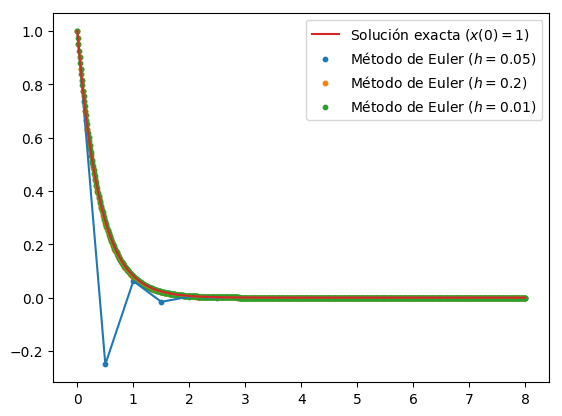

In [13]:
#graficamos para h=0.5,0.2,0.01
scatter(a3,e2,label=L"Método de Euler ($h=0.05$)",s=10)
plot(a3,e2)
scatter(a4,e3,label=L"Método de Euler ($h=0.2$)",s=10)
plot(a4,e3)
scatter(a5,e4,label=L"Método de Euler ($h=0.01$)",s=10)
plot(a5,e4)
plot(a2,exp.(-2.5*a2),label=L"Solución exacta ($x(0)=1$)")
legend()
show()

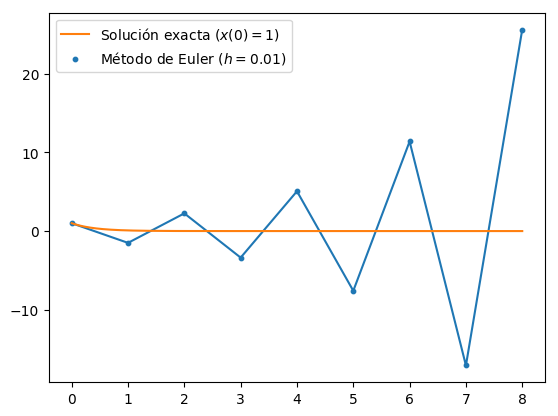

In [14]:
scatter(a1,e1,label=L"Método de Euler ($h=0.01$)",s=10)#graficamos aparte h=1 pues es el que mas se aleja de la solución
plot(a1,e1)
plot(a2,exp.(-2.5*a2),label=L"Solución exacta ($x(0)=1$)")
legend()
show()

In [15]:
E1=euler(f,2,a1)#ahora lo hacemos con la segunda condición

9-element Array{Float64,1}:
   2.0   
  -3.0   
   4.5   
  -6.75  
  10.125 
 -15.1875
  22.7813
 -34.1719
  51.2578

In [16]:
E2=euler(f,2,a3)

17-element Array{Float64,1}:
  2.0        
 -0.5        
  0.125      
 -0.03125    
  0.0078125  
 -0.00195313 
  0.000488281
 -0.00012207 
  3.05176e-5 
 -7.62939e-6 
  1.90735e-6 
 -4.76837e-7 
  1.19209e-7 
 -2.98023e-8 
  7.45058e-9 
 -1.86265e-9 
  4.65661e-10

In [17]:
E3=euler(f,2,a4)

401-element Array{Float64,1}:
 2.0       
 1.9       
 1.805     
 1.71475   
 1.62901   
 1.54756   
 1.47018   
 1.39667   
 1.32684   
 1.2605    
 1.19747   
 1.1376    
 1.08072   
 ⋮         
 4.32029e-9
 4.10427e-9
 3.89906e-9
 3.7041e-9 
 3.5189e-9 
 3.34295e-9
 3.17581e-9
 3.01702e-9
 2.86617e-9
 2.72286e-9
 2.58671e-9
 2.45738e-9

In [18]:
E4=euler(f,2,a5)

801-element Array{Float64,1}:
 2.0       
 1.95      
 1.90125   
 1.85372   
 1.80738   
 1.76219   
 1.71814   
 1.67518   
 1.6333    
 1.59247   
 1.55266   
 1.51384   
 1.476     
 ⋮         
 4.22349e-9
 4.11791e-9
 4.01496e-9
 3.91458e-9
 3.81672e-9
 3.7213e-9 
 3.62827e-9
 3.53756e-9
 3.44912e-9
 3.3629e-9 
 3.27882e-9
 3.19685e-9

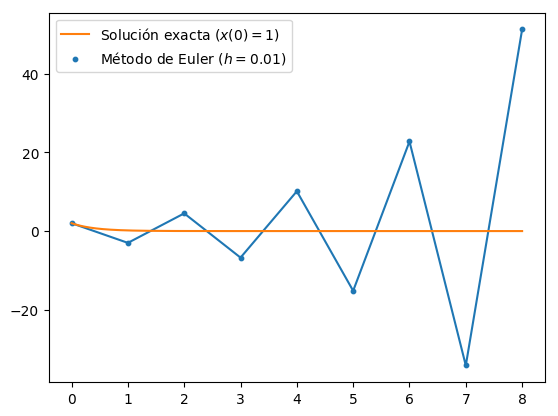

In [19]:
scatter(a1,E1,label=L"Método de Euler ($h=0.01$)",s=10)#graficamos aparte h=1 pues es el que mas se aleja de la solución
plot(a1,E1)
plot(a2,2*exp.(-2.5*a2),label=L"Solución exacta ($x(0)=1$)")
legend()
show()

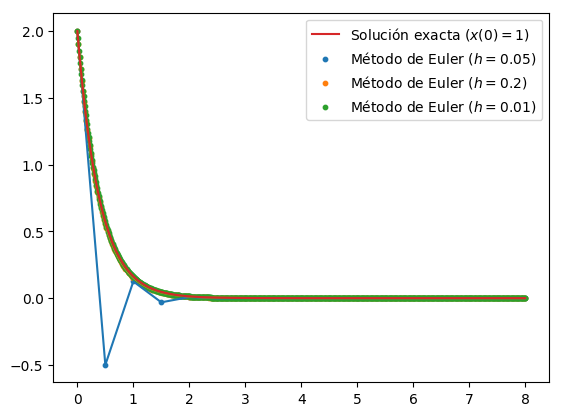

In [20]:
#graficamos para h=0.5,0.2,0.01
scatter(a3,E2,label=L"Método de Euler ($h=0.05$)",s=10)
plot(a3,E2)
scatter(a4,E3,label=L"Método de Euler ($h=0.2$)",s=10)
plot(a4,E3)
scatter(a5,E4,label=L"Método de Euler ($h=0.01$)",s=10)
plot(a5,E4)
plot(a2,2*exp.(-2.5*a2),label=L"Solución exacta ($x(0)=1$)")
legend()
show()

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

__Solución:__ el sistema fisico que es modelado es un oscilador armónico simple siempre y cuando $k'\geq 0$,haciendo $k'=mk$ se tiene $F=m\ddot{x} =
-k'x$, ahora bien, podemos hacer que $\omega^2=k$, de este modo tenemos que resolver:
$$\ddot{x} =-\omega^2 x$$ ahora proponemos la solución $x=A\cos(\omega t)+B\sin(\omega t)$, de esta manera $\dot{x}=\omega( -A\sin(\omega t)+B\cos(\omega t)) \therefore\ \ddot{x}=-\omega^2 (A\cos(\omega t)+B\sin(\omega t)=-\omega^2 x$ asi que resuelve la ecuación, ahora aplicamos condiciones iniciales:
$$x(0)=A\cos(0)+B\sin(0)=A\ y\ \dot{x}=\omega (-A\sin(0)+Bcos(0))=B\omega$$ así finalmente obtenemos que la solución:
$$x(t)=x(0)\cos(\omega t)+\frac{\dot{x}(0)}{\omega}\sin(\omega t)$$

__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

__solución:__si hacemos $u(t)=\dot{x}$ obtenemos que $\dot{u}=\ddot{x}$ por tanto por la ecuación original $\dot{u}=-kx$ por tanto tenemos el sistema de ecuaciones:
$$\left\{\begin{array}{ll}
\dot{x}=u, & x_{0}=x(0)\\
\dot{u}=-kx, & u_{0}=\dot{x}(0)
\end{array}\right.$$
el cual es equivalente a la ecuación de segundo orden, solo que ahora son dos ecuaciones de primer orden,además en general si se tiene: $\ddot{x}=f(x,\dot{x},t)$ con $x_{0}=x(t_{0})$ y $\dot{x}_{0}=\dot{x}(t_{0})$ siempre podemos hacer $u=\dot{x}$ y así $\dot{u}=f(x,u,t)$, por lo tanto al aplicar el método de Euler, se tiene:

$$\left\{\begin{array}{ll}
x_{k+1}=x_{k}+hu_{k}, & x_{0}=x(t_{0})\\
u_{k+1}=u_{k}+hf(x_{k},u_{k},t_{k}), & u_{0}=\dot{x}(t_{0})
\end{array}\right.$$

__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

__solución:__por conveniencia tomaremos $t\in (0,2\pi)$, ahora ocuparemos fuertemente la parte 2 y 3 de esta tarea:


In [21]:
doc"""
esta función usa el método de euler para ecuaciones diferenciales de orden dos de la forma $\ddot{x}=f(x,\dot{x},t)$, introduzca (f,x0,v0,ancho de aproximación) recuerde que x0 es condicion inicial en x y v0 en \dot{x}
"""
function euler_2(f,x0,v0,A)
    l=length(A) #elementos en A
    B=zeros(l) #guarda x_k
    C=zeros(l) #guarda x'_k
    B[1]=x0 #condición inicial en x
    C[1]=v0 #condición inicial en x'
    for i in 1:l-1 #este for sirve para aplicar el método
        h=A[i+1]-A[i]#espaciamiento
        B[i+1]=B[i]+h*C[i] # Método de Euler aplicado a x
        C[i+1]=C[i]+h*f(B[i],C[i],A[i]) # Método de Euler aplicado a x'
    end
    return B #dovolvemos los valores de x
end

euler_2

ahora vamos a probar esta función usando las siguientes condiciones y valores:
$$k=1;x_0=x(0)=1;\dot{x}(0)=v_0=-1$$
en cuyo caso por la parte 2 ya sabemos que entonces la solución exacta es:
$$x(t)=\sin(t)-\cos(t)$$

In [22]:
f(x,v,t)=-x#en este caso nuestra k=1, por lo cual esta es la función asociada


f (generic function with 2 methods)

In [23]:
b1=0:1:2pi
b2=0:0.5:2pi
b3=0:0.01:2pi#creamos valores que esten entre 0 y 2pi pero con diferente espaciamiento para apreciar su modo de convergencia

0.0:0.01:6.28

In [24]:
z1=euler_2(f,1,-1,b1)

7-element Array{Float64,1}:
  1.0
  0.0
 -2.0
 -4.0
 -4.0
  0.0
  8.0

In [25]:
z2=euler_2(f,1,-1,b2)

13-element Array{Float64,1}:
  1.0     
  0.5     
 -0.25    
 -1.125   
 -1.9375  
 -2.46875 
 -2.51563 
 -1.94531 
 -0.746094
  0.939453
  2.81152 
  4.44873 
  5.38306 

In [26]:
z3=euler_2(f,1,-1,b3)#con esto aplicamos a cada una de las listas el método

629-element Array{Float64,1}:
 1.0     
 0.99    
 0.9799  
 0.969701
 0.959404
 0.94901 
 0.93852 
 0.927935
 0.917257
 0.906485
 0.895622
 0.884668
 0.873625
 ⋮       
 1.1414  
 1.13232 
 1.12312 
 1.11382 
 1.1044  
 1.09487 
 1.08522 
 1.07547 
 1.06561 
 1.05565 
 1.04557 
 1.03539 

In [27]:
g(t)=cos(t)-sin(t)#ahora escribimos la función que ya observamos que era la solución exacta

g (generic function with 1 method)

In [28]:
b4=0:0.000001:2pi#creamos otra lista para graficar g

0.0:1.0e-6:6.283185

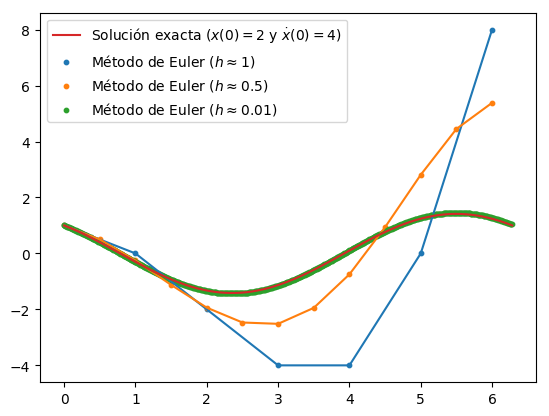

In [29]:
scatter(b1,z1,label=L"Método de Euler ($h\approx 1$)",s=10)#graficamos cada solución aproximada con puntos y lineas
plot(b1,z1)
scatter(b2,z2,label=L"Método de Euler ($h\approx 0.5$)",s=10)
plot(b2,z2)
scatter(b3,z3,label=L"Método de Euler ($h\approx 0.01$)",s=10)
plot(b3,z3)
plot(b4,g.(b4),label=L"Solución exacta ($x(0)=2$ y $\dot{x}(0)=4$)")#graficamos la solución exacta
legend()
show()

es importante notar como al inicio no se asemeja mucho la solución, sin embargo con la ultima iteración con $h\approx 0.01$ a simpre vista parecen indistinguibles, además $0.01$ es un valor que resulta ser no demasiado grande cualitativamente, por lo cual, el método se aproxima relativamente rápido

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

__solución:__antes vamos a realizar las siguiente observaciones:$$$$ $\bigstar$al ser una ecuación de primer orden podemos usar la función de la parte 1 $$$$ $\bigstar$ dado que la solución a comparar es $x(t)=-5t^2+8t+4$, por el teorema de unicidad esta es la única solución al problema: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.\ x(0)=4$$, esto lo usaremos pues para poder usar la función de la parte 1 es necesario tener una condición inicial

In [30]:
f(x,t)=(2x-18t)/(1+t)#definimos nuestra función f

f (generic function with 2 methods)

In [31]:
d1=0:1:2#creamos conjuntos de puntos los cuales nos daran aproximaciones para graficar en el intervalo [0,2]
d2=0:0.5:2
d3=0:0.01:2
d4=0:0.005:2
d5=linspace(0,2,10000000)#creamos un lisnpace para graficar la solución exacta

0.0:2.00000020000002e-7:2.0

In [32]:
p1=euler(f,4,d1)#ahora aplicaremos el método a cada arreglo

3-element Array{Float64,1}:
  4.0
 12.0
 15.0

In [33]:
p2=euler(f,4,d2)

5-element Array{Float64,1}:
  4.0   
  8.0   
 10.3333
 11.0   
 10.0   

In [34]:
p3=euler(f,4,d3)

201-element Array{Float64,1}:
 4.0     
 4.08    
 4.15901 
 4.23703 
 4.31406 
 4.3901  
 4.46515 
 4.53921 
 4.61228 
 4.68436 
 4.75545 
 4.82554 
 4.89465 
 ⋮       
 1.5299  
 1.42277 
 1.31465 
 1.20554 
 1.09545 
 0.984356
 0.872277
 0.759208
 0.645149
 0.530099
 0.414059
 0.29703 

In [35]:
p4=euler(f,4,d4)

401-element Array{Float64,1}:
 4.0     
 4.04    
 4.07975 
 4.11925 
 4.15851 
 4.19751 
 4.23627 
 4.27478 
 4.31303 
 4.35104 
 4.38881 
 4.42632 
 4.46358 
 ⋮       
 0.787363
 0.730597
 0.673582
 0.616318
 0.558806
 0.501045
 0.443035
 0.384776
 0.326269
 0.267512
 0.208507
 0.149254

In [36]:
p5=-5d5.^2+8d5+4#aplicamos la solución exacta al linspace para graficar

10000000-element Array{Float64,1}:
 4.0    
 4.0    
 4.0    
 4.0    
 4.00001
 4.00001
 4.00001
 4.00001
 4.00001
 4.00001
 4.00002
 4.00002
 4.00002
 ⋮      
 2.64e-5
 2.4e-5 
 2.16e-5
 1.92e-5
 1.68e-5
 1.44e-5
 1.2e-5 
 9.6e-6 
 7.2e-6 
 4.8e-6 
 2.4e-6 
 0.0    

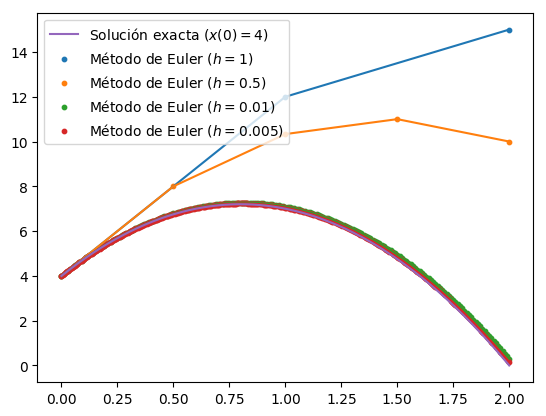

In [37]:
scatter(d1,p1,label=L"Método de Euler ($h=1$)",s=10)#ahora graficamos todos los resultados
plot(d1,p1)
scatter(d2,p2,label=L"Método de Euler ($h=0.5$)",s=10)
plot(d2,p2)
scatter(d3,p3,label=L"Método de Euler ($h=0.01$)",s=10)
plot(d3,p3)
scatter(d4,p4,label=L"Método de Euler ($h=0.005$)",s=10)
plot(d4,p4)
plot(d5,p5,label=L"Solución exacta ($x(0)=4$)")
legend()
show()

como ultima conclusión es importante notar que siempre que se añaden mas puntos $h$ decrece y si eso ocurre entonces el error disminuye $n\uparrow\ \Rightarrow \ h\downarrow\ \Rightarrow \ error\downarrow$ osea $n\rightarrow \infty\ \Rightarrow\ h\rightarrow0\ \Rightarrow\ error\rightarrow 0$